#Задание 1

Построить модель линейной регрессии.

* линейная модель
* полином второй степени
* полином третьей степени
* экспонента

Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки.
* Посчитать MSE для каждого случая
* Выбрать наилучший вариант (без тестовой выборки)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

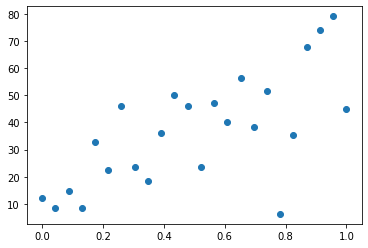

In [2]:
plt.scatter(x, y);

In [3]:
X1 = list(zip(np.ones(24), x))
X2 = list(zip(np.ones(24), x, x*x))
X3 = list(zip(np.ones(24), x, x*x, x*x*x))
X_exp = list(zip(np.ones(24), np.exp(x)))

W1 = np.linalg.lstsq(X1, y, rcond=None)[0]
W2 = np.linalg.lstsq(X2, y, rcond=None)[0]
W3 = np.linalg.lstsq(X3, y, rcond=None)[0]
W_exp = np.linalg.lstsq(X_exp, y, rcond=None)[0]


In [4]:
def f1(x, w): 
    return w[0] + w[1]*x

def f2(x, w): 
    return w[0] + w[1]*x + w[2]*x**2

def f3(x, w): 
    return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

def exp(x, w):
    return w[0] + w[1]*np.exp(x)

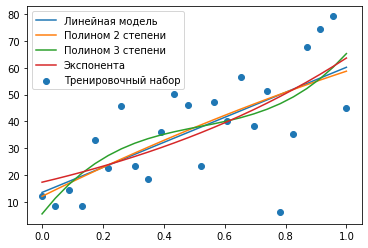

In [5]:
plt.scatter(x, y, label='Тренировочный набор')
plt.plot(x, f1(x, W1), label='Линейная модель')
plt.plot(x, f2(x, W2), label='Полином 2 степени')
plt.plot(x, f3(x, W3), label='Полином 3 степени')
plt.plot(x, exp(x, W_exp), label = 'Экспонента')
plt.legend();

In [6]:
print(mean_squared_error(y, f1(x, W1)))
print(mean_squared_error(y, f2(x, W2)))
print(mean_squared_error(y, f3(x, W3)))
print(mean_squared_error(y, exp(x, W_exp)))

213.13469863888886
212.59353678557318
202.51303659090908
218.24309186403494


Полином 3 степени оказался лучшей моделью


#Задание 2

Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

1. Разделите данные на train/test или используйте кросс-валидацию (можно grid search)

2. Постройте несколько моделей линейной регрессии:

* sklearn.linear_model.LinearRegression
* sklearn.linear_model.Ridge
* sklearn.linear_model.Lasso
* sklearn.linear_model.ElasticNet
3. Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.
4. Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)
5. Какая модель оказалась наилучшей? Почему?

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [8]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Ridge = linear_model.Ridge()
Ridge.fit(X_train, y_train)
y_pred_Ridge = Ridge.predict(X_test)

Lasso = linear_model.Lasso()
Lasso.fit(X_train, y_train)
y_pred_Lasso = Lasso.predict(X_test)

ElasticNet = linear_model.ElasticNet()
ElasticNet.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet.predict(X_test)

In [9]:
def report(y_test, y_pred):
    print('MSE = ', mean_squared_error(y_test, y_pred))
    print('R2 score = ', r2_score(y_test, y_pred))
    print('--------------------------------------')

In [10]:
print('Linear Regression:')
report(y_test, y_pred_lr)
print('Ridge:')
report(y_test, y_pred_Ridge)
print('Lasso:')
report(y_test, y_pred_Lasso)
print('ElasticNet:')
report(y_test, y_pred_ElasticNet)

Linear Regression:
MSE =  2900.1732878832318
R2 score =  0.452606602161738
--------------------------------------
Ridge:
MSE =  3077.4142782200897
R2 score =  0.4191532397912693
--------------------------------------
Lasso:
MSE =  3403.5701919165826
R2 score =  0.3575929204237066
--------------------------------------
ElasticNet:
MSE =  5311.212718027376
R2 score =  -0.0024651935487560728
--------------------------------------


Теперь подберем параметры при помощи GridSearch

In [11]:
alphas = np.array([1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.1, 0, 1, 5, 10, 20])
models = {'Ridge': Ridge, 
          'Lasso': Lasso, 
          'ElasticNet': ElasticNet}
for model in models:
    grid = GridSearchCV(estimator=models.get(model), param_grid=dict(alpha=alphas))
    grid.fit(X_train, y_train)
    print(model + ' alpha = ' + str(grid.best_estimator_.alpha))

Ridge alpha = 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.118e+05, tolerance: 1.706e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+05, tolerance: 1.758e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Lasso alpha = 0.1
ElasticNet alpha = 0.001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.118e+05, tolerance: 1.706e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+05, tolerance: 1.758e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [12]:
Ridge = linear_model.Ridge(alpha=0.1)
Lasso = linear_model.Lasso(alpha=0.1)
Elastic = linear_model.ElasticNet(alpha = 0.001)
y_pred_Ridge = Ridge.fit(X_train, y_train).predict(X_test)
y_pred_Lasso = Lasso.fit(X_train, y_train).predict(X_test)
y_pred_ElasticNet = ElasticNet.fit(X_train, y_train).predict(X_test)

In [13]:
print('Linear Regression:')
report(y_test, y_pred_lr)
print('Ridge:')
report(y_test, y_pred_Ridge)
print('Lasso:')
report(y_test, y_pred_Lasso)
print('ElasticNet:')
report(y_test, y_pred_ElasticNet)

Linear Regression:
MSE =  2900.1732878832318
R2 score =  0.452606602161738
--------------------------------------
Ridge:
MSE =  2856.4817315700866
R2 score =  0.46085316782973296
--------------------------------------
Lasso:
MSE =  2798.190968742363
R2 score =  0.47185526169086933
--------------------------------------
ElasticNet:
MSE =  5311.212718027376
R2 score =  -0.0024651935487560728
--------------------------------------


Лучшей моделью оказалась LASSO регрессия, так как у нее наименьший MSE.